In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
titanic_df=pd.read_excel(r"/content/Titanic_Survival_Train.xls",header=0,index_col=0)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


###  Insight:
##### We have 177 null values in Age column,687 null values in Cabin and 2 null values in Embarked

In [ ]:
titanic_df.isnull().sum()/len(titanic_df)*100

,0
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,77.104377


### Insight
#####  We have 77.10% of null values in Cabin so if we fill that column than it will have same values so it will affect calculation. We can fill Age and Embarked column.

In [ ]:
titanic_df.nunique()

,0
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


###  Insight:
#####  We have many unique values in each column but it is necessary to keep.

In [ ]:
titanic_df["Age"].fillna(method="ffill",inplace=True)

/tmp/ipython-input-196982560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Age"].fillna(method="ffill",inplace=True)
/tmp/ipython-input-196982560.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic_df["Age"].fillna(method="ffill",inplace=True)


In [ ]:
titanic_df["Embarked"].fillna(method="bfill",inplace=True)

/tmp/ipython-input-631548009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Embarked"].fillna(method="bfill",inplace=True)
/tmp/ipython-input-631548009.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic_df["Embarked"].fillna(method="bfill",inplace=True)


In [ ]:
titanic_df.drop(["Cabin"],axis=1,inplace=True)

### Insight:
#####  I have now filled Age and Embarked column with ffill and bfill method and I have dropped Cabin column.Now we don't have any null values in our data set.

In [ ]:
titanic_df.shape

(891, 10)

### Insight:
#####  The shape of titanic_df dataset is 891 rows and 10 columns.

In [ ]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


### Insight:
#####  The 50% of passengers are travelling in 3rd class.
#####  The 50% of passengers have age of 28.

In [ ]:
print(titanic_df["Fare"].mode())

0    8.05
Name: Fare, dtype: float64


### Insight:
#####  The maximum passengers have paid fare of 8.05

In [ ]:
print(titanic_df["Age"].mode())

0    24.0
Name: Age, dtype: float64


### Insight:
#####  The maximum passengers from titanic has the age of 24.0.

In [ ]:
print(titanic_df["Fare"].sum())

28693.9493


### Insight:
#####  The total fare earned from titanic is 28693.94

In [ ]:
titanic_df.applymap(lambda i:i.capitalize() if type(i)==str else i)

/tmp/ipython-input-1255402046.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  titanic_df.applymap(lambda i:i.capitalize() if type(i)==str else i)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, mr. owen harris",Male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, mrs. john bradley (florence briggs th...",Female,38.0,1,0,Pc 17599,71.2833,C
3,1,3,"Heikkinen, miss. laina",Female,26.0,0,0,Ston/o2. 3101282,7.9250,S
4,1,1,"Futrelle, mrs. jacques heath (lily may peel)",Female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, mr. william henry",Male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, rev. juozas",Male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, miss. margaret edith",Female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, miss. catherine helen ""carrie""",Female,19.0,1,2,W./c. 6607,23.4500,S


In [ ]:
print(titanic_df.Embarked.unique())
print(titanic_df.Sex.unique())
print(titanic_df.Pclass.unique())
print(titanic_df.Survived.unique())


['S' 'C' 'Q']
['male' 'female']
[3 1 2]
[0 1]


### Insight:
#####  Embarked is done from 3 places S,C,Q.
#####  In Sex we have 2 values male and female.
#####  The Pclass is of three types 1,2&3.
#####  The survived column has 2 values i.e. 0 & 1. 0 means dead and 1 means which are alive

In [ ]:
print(titanic_df.Sex.value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


### Insight:
#####  From 891 passengers there are 577 male and 314 female.

In [ ]:
print(titanic_df.Sex.value_counts()/len(titanic_df)*100)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


Axes(0.22375,0.11;0.5775x0.77)


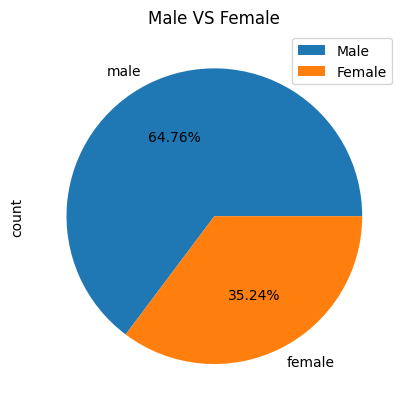

In [ ]:
print(titanic_df.Sex.value_counts().plot(kind="pie",autopct="%.2f%%"))
plt.title("Male VS Female")
plt.legend(["Male","Female"])
plt.show()

### Insight:
#####  We have 64.76% of passenger as male & 35.24% of passenger is female.
#####  The maximum number of passenger are male in titanic_df dataset.

In [ ]:
titanic_df[(titanic_df.Pclass==1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C


### Insight:
##### The number of passengers travelling from 1st class are 216.

In [ ]:
titanic_df[(titanic_df.Pclass==2)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
18,1,2,"Williams, Mr. Charles Eugene",male,2.0,0,0,244373,13.0000,S
21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,S
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S
...,...,...,...,...,...,...,...,...,...,...
867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S


### Insight:
#####  The number of passengers travelling from 2nd class is 184

In [ ]:
titanic_df[(titanic_df.Pclass==3)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


### Insight:
##### The number of passengers travelling from 3rd class is 491

##### The maximum number of passengers are travelling from 3rd class.

In [ ]:
print(titanic_df.Age.max())
print(titanic_df.Age.min())
print(titanic_df.sort_values(by="Age",ascending=True).head(1))
print(titanic_df.sort_values(by="Age",ascending=False).head(1))



80.0
0.42
             Survived  Pclass                             Name   Sex   Age  \
PassengerId                                                                  
804                 1       3  Thomas, Master. Assad Alexander  male  0.42   

             SibSp  Parch Ticket    Fare Embarked  
PassengerId                                        
804              0      1   2625  8.5167        C  
             Survived  Pclass                                  Name   Sex  \
PassengerId                                                                 
631                 1       1  Barkworth, Mr. Algernon Henry Wilson  male   

              Age  SibSp  Parch Ticket  Fare Embarked  
PassengerId                                            
631          80.0      0      0  27042  30.0        S  


###  Insight:
#####  The maximum age of passenger is 80.0 and minimum age of passenger is 0.42.
#####  The passenger with maximum age is Barkworth, Mr. Algernon Henry Wilson and passenger with minimum age is Thomas, Master. Assad Alexander.Both the passenger with max and min age are male.

In [ ]:
titanic_df.pivot_table(index="Sex",values=["Embarked","Age"],aggfunc="max")

,Age,Embarked
Sex,,
female,65.0,S
male,80.0,S


### Insight:
#####  The female maximum age is 65 and male maximum age is 80 in titanic.
#####  The maximum male & female has embarked from S.

In [ ]:
print(titanic_df.Survived.value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


### Insight:
#####  The 549 passengers have not survived and 342 passenger has survived.

In [ ]:
print(titanic_df.Survived.value_counts()/len(titanic_df)*100)

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64


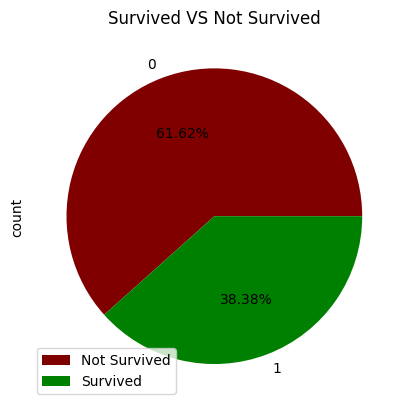

In [ ]:
titanic_df["Survived"].value_counts().plot(kind="pie",autopct="%.2f%%",colors=["maroon","green"])
plt.title("Survived VS Not Survived")
plt.legend(["Not Survived","Survived"])
plt.show()

###  Insight:
#####  The survived passengers are about 61.61% and not survived passenger are about 38.38%.
##### The most of the passenger from titanic have not survived.

In [ ]:
titanic_df[(titanic_df.Age>80.0)&(titanic_df.Survived==1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


### Insight:
#####  There is not any passenger whose age is greater than maximum age and he is survived.

In [ ]:
titanic_df[(titanic_df.Survived==0)&(titanic_df.Age>80.0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


### Insight:
##### There is not any passenger whose age is greater than maximum age and he is not survived.

In [ ]:
titanic_df[(titanic_df.Survived==1)& (titanic_df.Age>=60)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
56,1,1,"Woolner, Mr. Hugh",male,65.0,0,0,19947,35.5000,S
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C
368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,60.0,0,0,2626,7.2292,C
369,1,3,"Jermyn, Miss. Annie",female,60.0,0,0,14313,7.7500,Q
458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,65.0,1,0,17464,51.8625,S
484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,S
571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,S
588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,C


### Insight:
##### There are 11 passengers whose age>=60 and they have survived.

In [ ]:
C=pd.crosstab(titanic_df["Sex"],titanic_df["Survived"])
C

Survived,0,1
Sex,,
female,81,233
male,468,109


### Insight:
#####  The total number of males are 577 and not survived from them are 468.
##### The total number of females are 314 and survived from them are 233.
##### The more number of passengers who have not survived are of male.

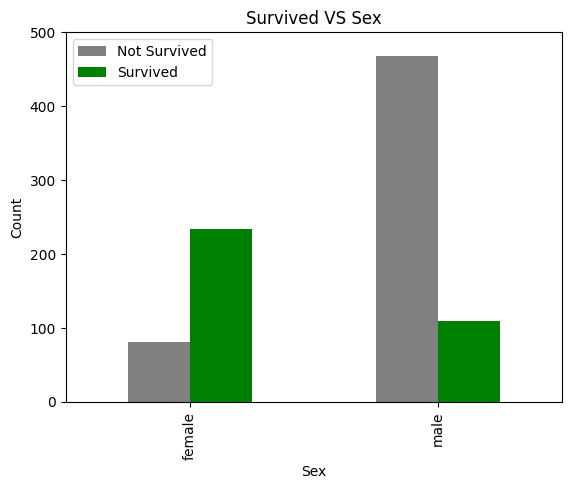

In [ ]:
C.plot(kind="bar",color=["grey","green"])
plt.title("Survived VS Sex")
plt.ylabel("Count")
plt.ylim(0,500)
plt.legend(["Not Survived","Survived"])
plt.show()

### Insight:
##### The more number of passengers who are not survived are male.

In [ ]:
c1=pd.crosstab(titanic_df["Survived"],titanic_df["Embarked"],titanic_df["Age"],aggfunc="max")
c1

Embarked,C,Q,S
Survived,,,
0,71.0,70.5,74.0
1,62.0,60.0,80.0


### Insight:
#####  The passengers who have embarked from C and not survived has max age of 71.0 and who survived have max age of 62.0.
#####  The passengers who have embarked from Q and not survived has max age of 70.5 and who survived have max age of 60.0.
##### The passengers who have embarked from S and not survived has max age of 74.0 and who survived have max age of 80.0.

In [ ]:
c2=pd.crosstab(titanic_df["Survived"],titanic_df["Pclass"])
c2

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


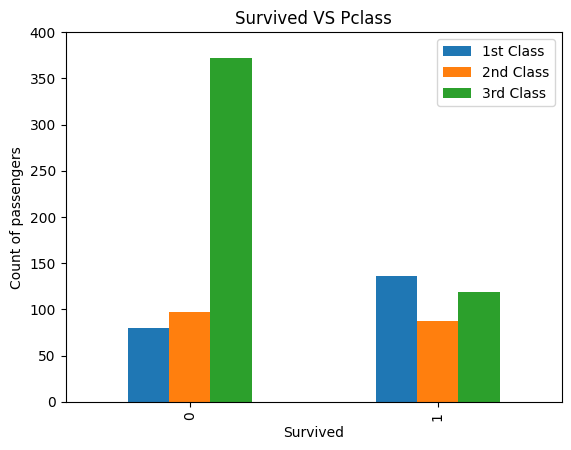

In [ ]:
c2.plot(kind="bar")
plt.xlabel("Survived")
plt.ylabel("Count of passengers")
plt.title("Survived VS Pclass")
plt.legend(["1st Class","2nd Class","3rd Class"])
plt.ylim(0,400)
plt.show()


### Insight:
#####  The passengers who have not survived from 1st class are 80 and who are survived are 136.
#####  The passengers who have not survived from 2snd class are 97 and who are survived are 87.
#####  The passengers who have not survived from 3rd class are 372 and who are survived are 119.

##### The more number of passengers who have not survived are from 3rd class i.e. 372.

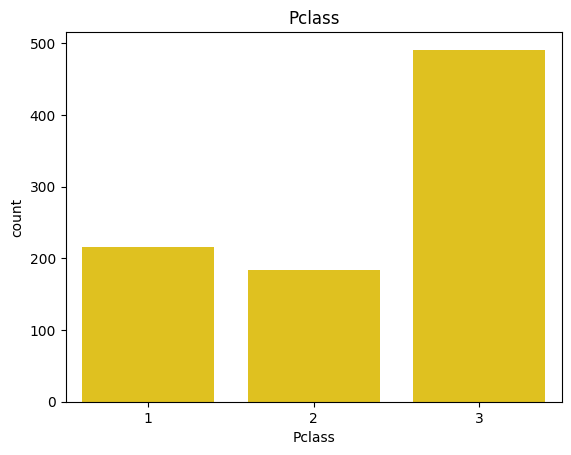

In [ ]:
sns.countplot(x="Pclass",data=titanic_df,color="gold")
plt.title("Pclass")
plt.show()

### Insight:
#####  The more number of passengers are travelling from 3rd class.

In [ ]:
titanic_df["Embarked"].value_counts()

,count
Embarked,
S,645
C,169
Q,77


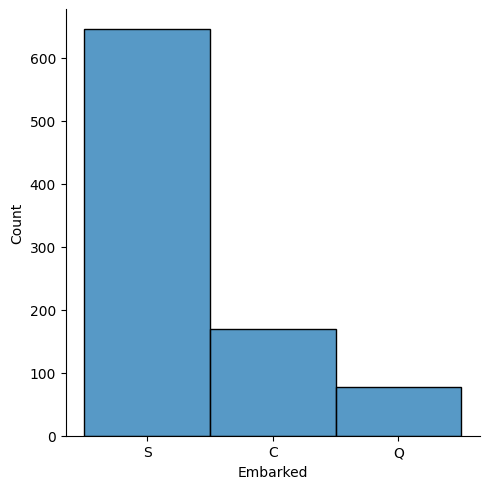

In [ ]:
sns.displot(titanic_df.Embarked);

### Insight:
#####  The maximum number of passengers are Embarked from S i.e. 645.

In [ ]:
titanic_df["Fare"].max()

512.3292

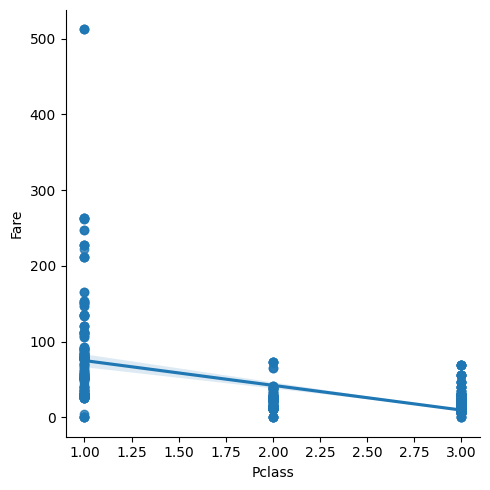

In [ ]:
sns.lmplot(data=titanic_df,x="Pclass",y="Fare")

### Insight:
#####  We can see as the class goes from 1st to 2nd to 3rd the fare goes decreasing. The maximum fare is 512.32 i.e. of the 1st class.
#####  The 1st class has the high fare and 3rd class has the low fare.

In [ ]:
titanic_df.sort_values(by="Fare",ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S
...,...,...,...,...,...,...,...,...,...,...
807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S
816,0,1,"Fry, Mr. Richard",male,30.5,0,0,112058,0.0000,S
467,0,2,"Campbell, Mr. William",male,38.0,0,0,239853,0.0000,S


### Insight:
##### The highest fare was 512.32 and 3 passengers have paid that fare they are
#####  1.Cardeza, Mr. Thomas Drake Martinez
#####  2.Ward, Miss. Anna
#####  3.Lesurer, Mr. Gustave J
#####  In this 2 are male and 1 is female and they are adult and all 3 have survived.

In [ ]:
titanic_df.Fare.min()

0.0

### Insight:
##### The minimum fare is 0.0

In [ ]:
titanic_df.sort_values(by="Fare",ascending=True).head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
816,0,1,"Fry, Mr. Richard",male,30.5,0,0,112058,0.0000,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,33.0,0,0,239853,0.0000,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,9.0,0,0,239854,0.0000,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,45.0,0,0,239853,0.0000,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,S


### Insight:
#####  The minimum fare is paid by 15 passengers and only 1 passenger is able to survived from 15 remaining 14 was not able to survive.

<Axes: xlabel='Embarked', ylabel='Fare'>

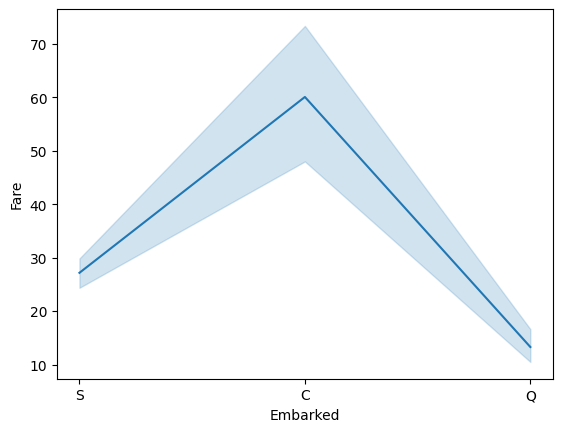

In [ ]:
sns.lineplot(data=titanic_df,x="Embarked",y="Fare")

### Insight:
#####  The passengers who have Embarked from C have high fare and passengers Embarked from Q has low fare.

In [ ]:
child=titanic_df[(titanic_df.Age<=12)]
child

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
18,1,2,"Williams, Mr. Charles Eugene",male,2.00,0,0,244373,13.0000,S
25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
833,0,3,"Saad, Mr. Amin",male,0.83,0,0,2671,7.2292,C
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,S


In [ ]:
print(child.value_counts().sum())

92


In [ ]:
child.value_counts().sum()/len(titanic_df)*100

np.float64(10.32547699214366)

### Insight: The total number of childs are 92 in titanic.
#####  In titanic there are 10.32% of child.


In [ ]:
teenagers=titanic_df[(titanic_df.Age>=13)&(titanic_df.Age<=17)]
teenagers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,C
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S
85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,S
87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S
88,0,3,"Slocovski, Mr. Selman Francis",male,16.0,0,0,SOTON/OQ 392086,8.0500,S


In [ ]:
teenagers.value_counts().sum()

np.int64(51)

In [ ]:
teenagers.value_counts().sum()/len(titanic_df)*100

np.float64(5.723905723905724)

### Insight:
##### Total number of teenagers are 51 in titanic.
##### The 5.72% of passenger in titanic is teenagers.

In [ ]:
adult=titanic_df[(titanic_df.Age>=18)&(titanic_df.Age<=59)]
adult

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,S


In [ ]:
adult.value_counts().sum()

np.int64(718)

In [ ]:
adult.value_counts().sum()/len(titanic_df)*100

np.float64(80.58361391694724)

### Insight:
##### There are 718 passenger in titanic who are adult.
##### The percentage of adult in titanic is 80.58%.


In [ ]:
senior=titanic_df[(titanic_df.Age>59)]
senior

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
56,1,1,"Woolner, Mr. Hugh",male,65.0,0,0,19947,35.5000,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q


In [ ]:
senior.value_counts().sum()

np.int64(30)

In [ ]:
senior.value_counts().sum()/len(titanic_df)*100

np.float64(3.3670033670033668)

### Insight:
#####  The total number of senior citizens in titanic is 30.
#####  The percentage of senior citizens in titanic is 3.36%.

In [ ]:
adult.Sex.value_counts()

,count
Sex,
male,474
female,244


### Insight:
#####  The 80.58% of the passengers travelling in titanic were adult.
#####  The total number of adult passengers are 718.
#####  There age was between 18 to 59.
#####  From 718 adult passengers 474 are male and 244 are female.
#####  The male passengers are more of adult age.


In [ ]:
pd.crosstab(adult["Survived"],adult["Sex"])

Sex,female,male
Survived,,
0,63,398
1,181,76


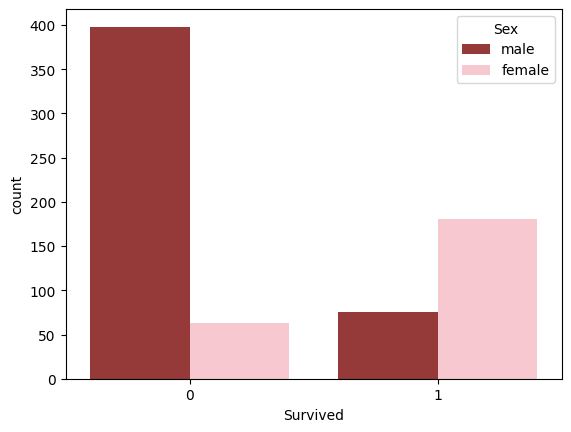

In [ ]:
sns.countplot(data=adult,x="Survived",hue="Sex",palette=["brown","pink"])
plt.show()

### Insight:
##### The more number of passengers who were adult not able to survive are of male.
##### The female who were adult has survived more as compare to adult male.

### Insight:
#####  The number of adult female who has survived are 181 and male are 76.
#####  The number of adult female who were not able to survive are 63 and male are 398.

### Insight:
#####  The more number of passengers who are not able to survive are from adult group.

## **Done with the project**
### **Thank you**